In [1]:
from sklearn import tree
from sklearn.datasets import load_iris

import graphviz

In [2]:
X = [[0,0], [1,1]]
Y = [0,1]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [3]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [4]:
clf.predict([[1, 1]])

array([1])

In [5]:
iris = load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

- build tree

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

- visualize tree

In [7]:
dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                feature_names = iris.feature_names,
                                class_names = iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True
                               )

In [8]:
graph = graphviz.Source(dot_data)

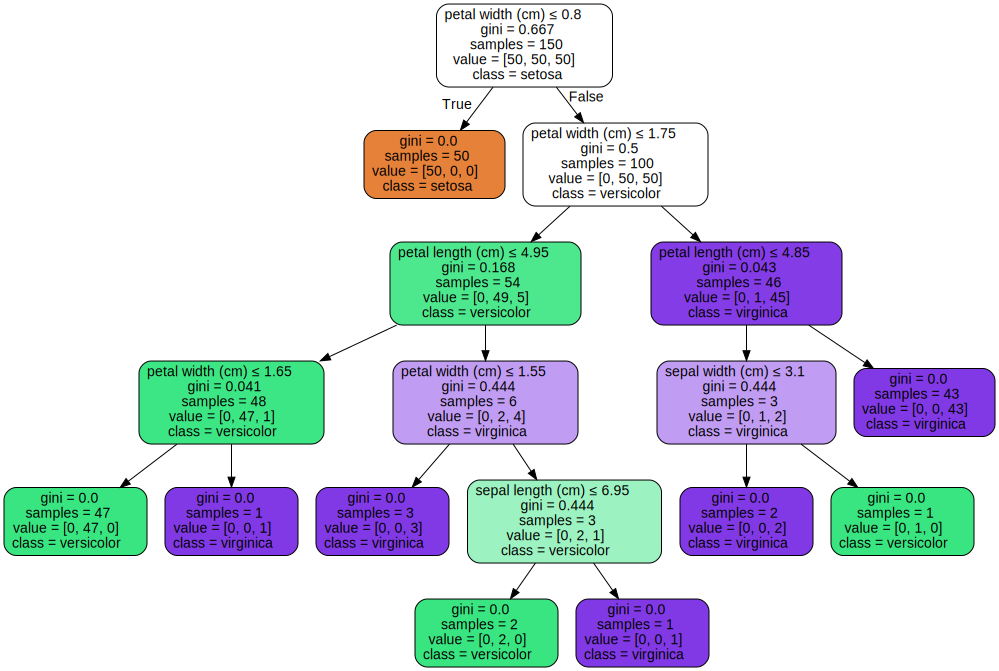

In [9]:
graph

- Create tree using entropy

In [10]:
clf2 = tree.DecisionTreeClassifier(criterion="entropy")

In [12]:
clf2.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
# visualize clf2
dot_data2 = tree.export_graphviz(clf2,
                                out_file=None,
                                feature_names = iris.feature_names,
                                class_names = iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True
                               )

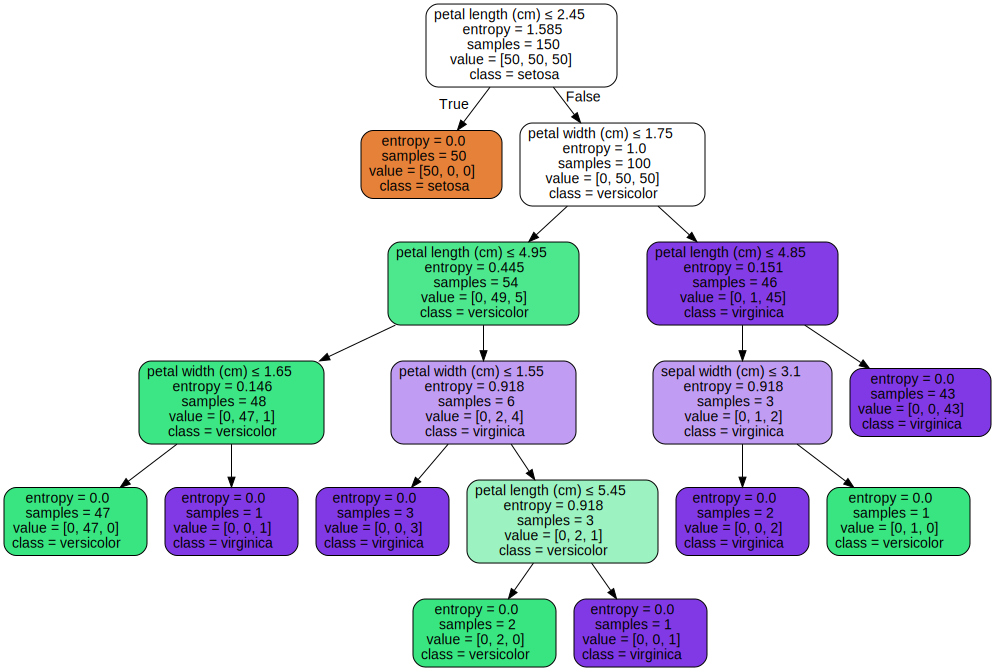

In [14]:
graph2 = graphviz.Source(dot_data2)
graph2

- pruning : shortening the tree depth

In [15]:
clf3 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)

In [18]:
clf3.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
# visualize clf3
dot_data3 = tree.export_graphviz(clf3,
                                out_file=None,
                                feature_names = iris.feature_names,
                                class_names = iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True
                               )

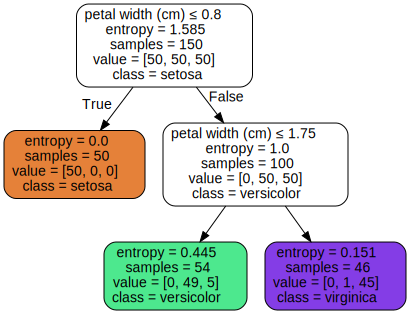

In [20]:
graph3 = graphviz.Source(dot_data3)
graph3

- confusion matrx

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(iris.target, clf.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

In [23]:
confusion_matrix(iris.target, clf2.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

In [24]:
confusion_matrix(iris.target, clf3.predict(iris.data))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]])